In [24]:
import scvi
import scanpy as sc
import matplotlib

In [8]:
adata = sc.read("/nfs/team205/sm58/packages/dis2p_trials/download/PAN.A01.v01.raw_count.20210429.PFI.embedding.h5ad")

Only considering the two last: ['.embedding', '.h5ad'].
Only considering the two last: ['.embedding', '.h5ad'].


In [9]:
adata

AnnData object with n_obs × n_vars = 911873 × 33538
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation'
    var: 'GeneID', 'GeneName', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'scvi_model_var'
    uns: 'leiden', 'scvi', 'umap'
    obsm: 'X_scvi', 'X_umap'
    obsp: 'scvi_connectivities', 'scvi_distances'

In [21]:
adata.obs["anno_lvl_2_final_clean"].unique()

['CYCLING_DC', 'EARLY_ERY', 'PRE_DC2', 'MONOCYTE_II_CCR2', 'LARGE_PRE_B', ..., 'ENDOTHELIUM_V', 'SKELETAL_MUSCLE', 'FIBROBLAST_XVI', 'OSTEOCLAST', 'CHONDROCYTE']
Length: 139
Categories (138, object): ['ABT(ENTRY)', 'AS_DC', 'B1', 'CD4+T', ..., 'VSMC_PERICYTE_II', 'VSMC_PERICYTE_III', 'YS_ERY', 'YS_STROMA']

In [22]:
adata.obs["celltype_annotation"].unique()

['CYCLING_DC', 'EARLY_ERY', 'PRE_DC2', 'MONOCYTE_II_CCR2', 'LARGE_PRE_B', ..., 'ENDOTHELIUM_V', 'SKELETAL_MUSCLE', 'FIBROBLAST_XVI', 'OSTEOCLAST', 'CHONDROCYTE']
Length: 139
Categories (138, object): ['ABT(ENTRY)', 'AS_DC', 'B1', 'CD4+T', ..., 'VSMC_PERICYTE_II', 'VSMC_PERICYTE_III', 'YS_ERY', 'YS_STROMA']

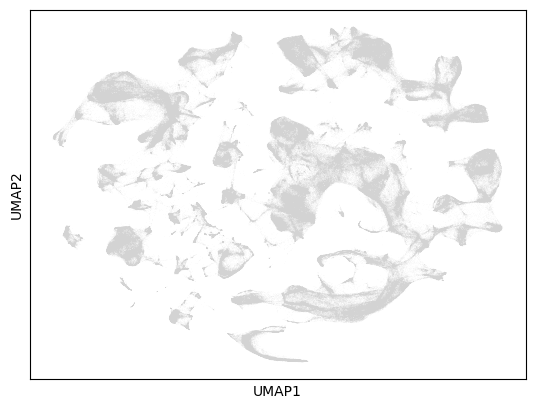

In [10]:
sc.pl.umap(adata)


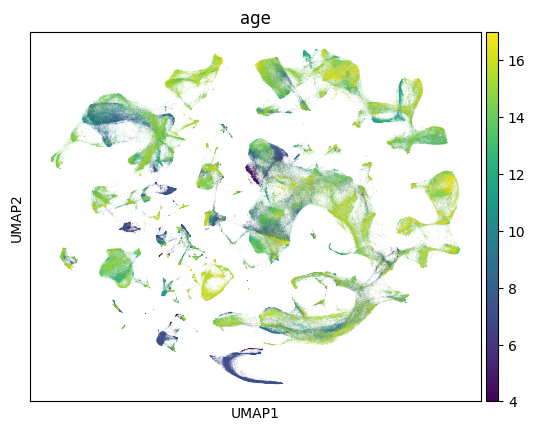

In [16]:
sc.pl.umap(adata, color=['age'])


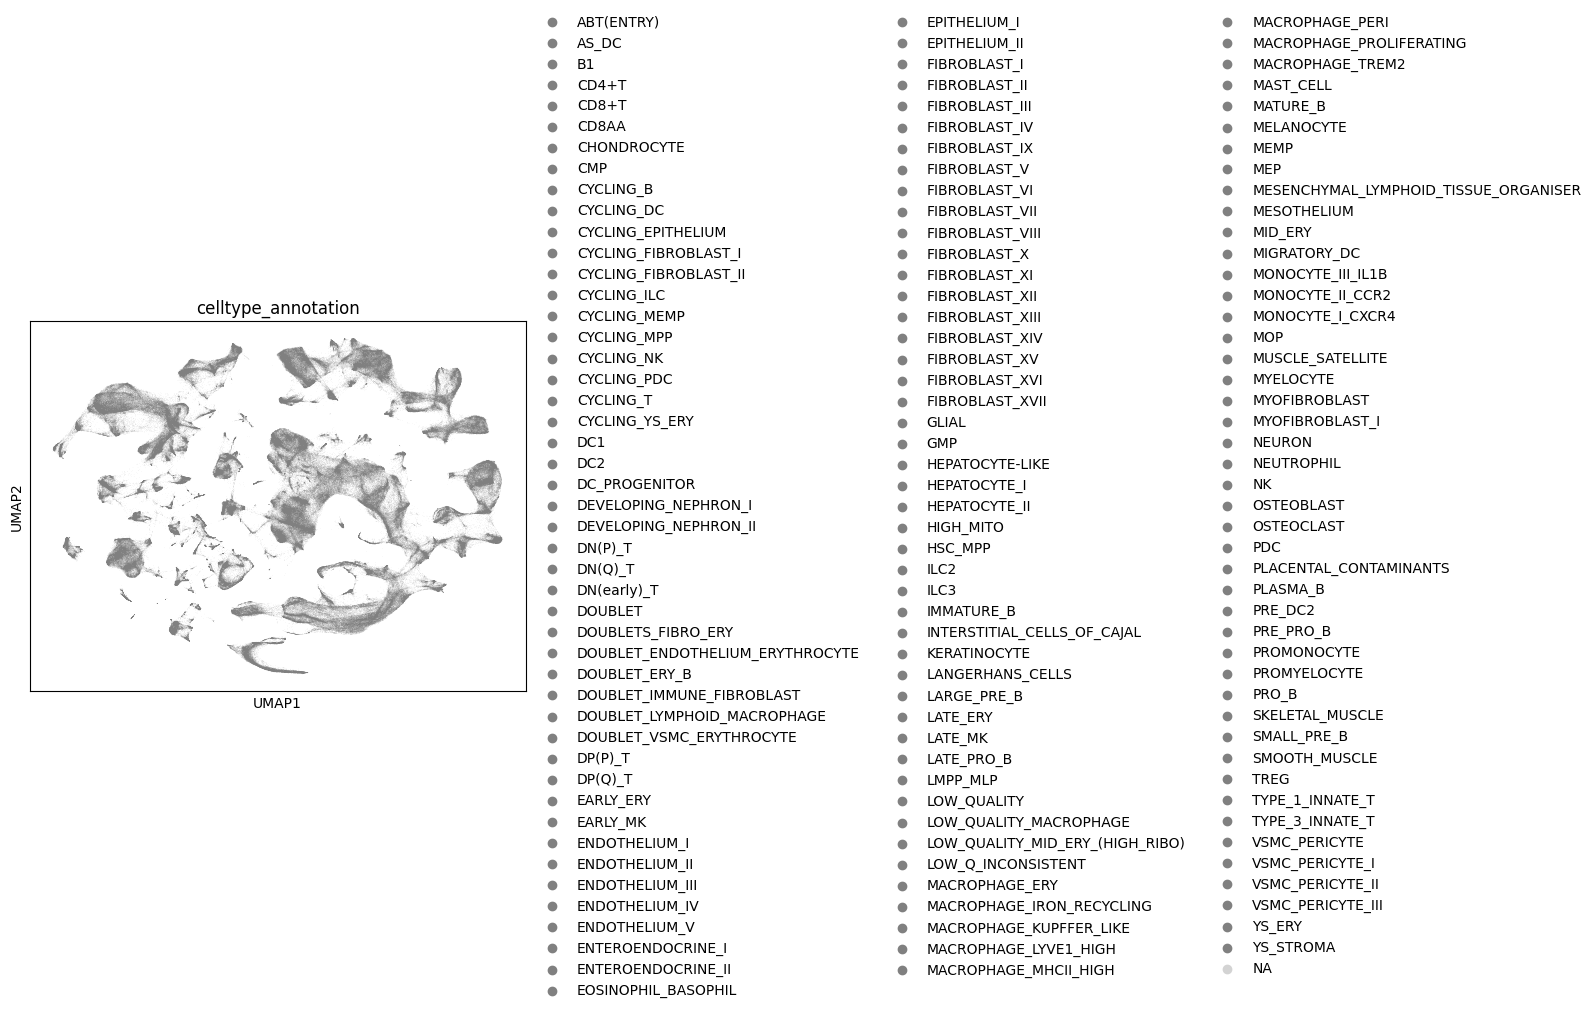

In [12]:
sc.pl.umap(adata, color=['celltype_annotation'])


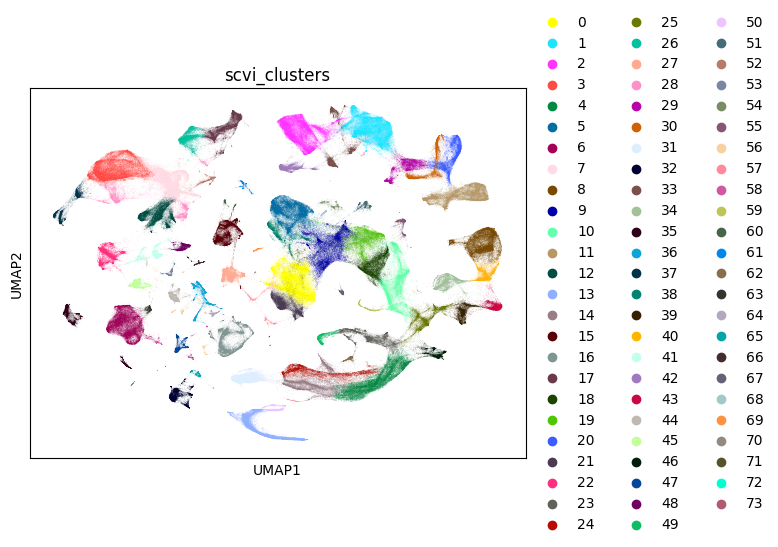

In [13]:
sc.pl.umap(adata, color=[ 'scvi_clusters'])


In [46]:
sub = adata[adata.obs['celltype_annotation'].isin(['CMP', 'CYCLING_MEMP', 'CYCLING_MPP', 'EARLY_ERYTHROID', 'EARLY_MK', 'EOSINOPHIL_BASOPHIL', 
                                                   'GMP', 'HSC_MPP', 'LATE_ERYTHROID', 'LATE_MK', 'LMPP_MLP', 'MAST_CELL', 'MEMP', 'MEP', 'MID_ERY', 'MOP'])].copy()

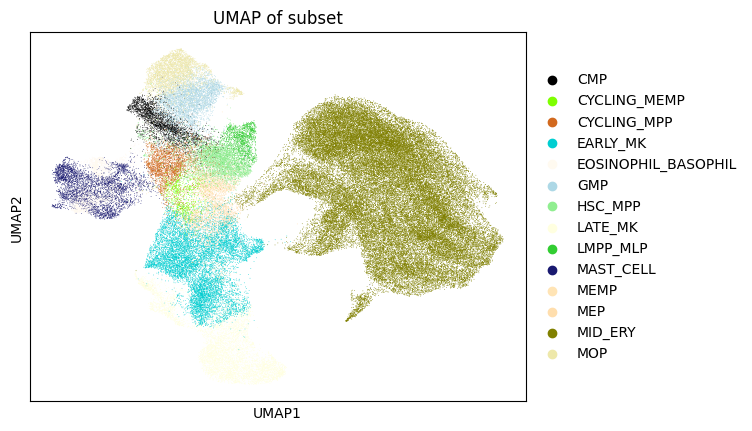

In [48]:
sc.pp.neighbors(sub, use_rep='X_scvi', random_state=42)  
sc.tl.umap(sub, random_state=42) 
sc.pl.umap(sub, color='celltype_annotation', title="UMAP of subset")


In [49]:
sub

AnnData object with n_obs × n_vars = 99505 × 33538
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation'
    var: 'GeneID', 'GeneName', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'scvi_model_var'
    uns: 'leiden', 'scvi', 'umap', 'celltype_annotation_colors', 'scvi_clusters_colors', 'anno_lvl_2_final_clean_colors', 'pca', 'neighbors'
    obsm: 'X_scvi', 'X_umap', 'X_pca'
    varm: 'PCs'
    obsp: 'scvi_connectivities', 'scvi_distances', 'distances', 'connectivities'

In [51]:
sc.tl.leiden(sub, resolution=1.0, key_added="leiden_clusters_sub")

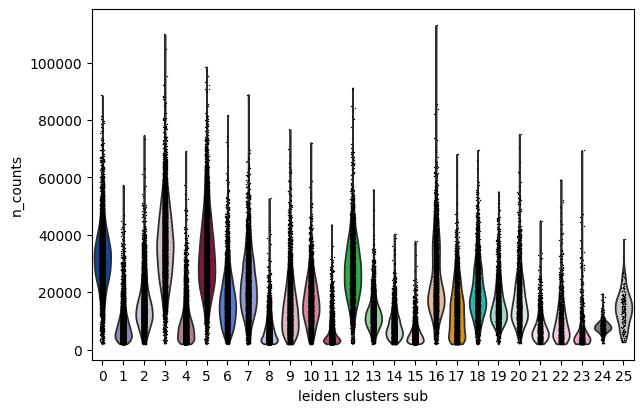

In [54]:
sc.pl.violin(sub, keys='n_counts', groupby='leiden_clusters_sub', 
             stripplot=True, jitter=True)

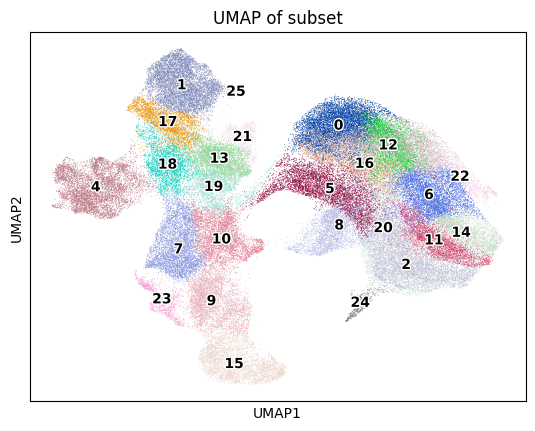

In [55]:
sc.pl.umap(
    sub, 
    color='leiden_clusters_sub', 
    title="UMAP of subset", 
    legend_loc='on data',  
    legend_fontsize=10,    
    legend_fontoutline=2   
)

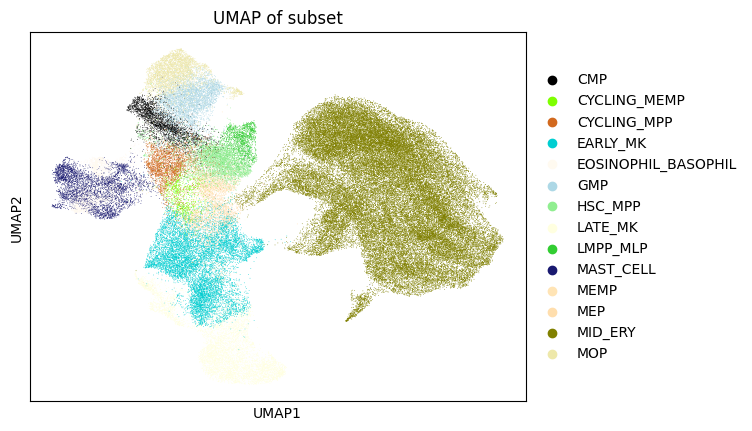

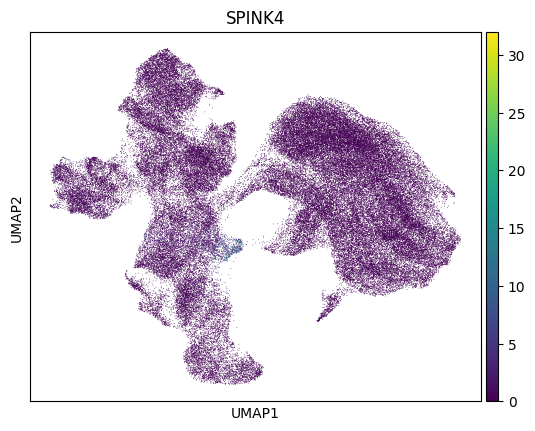

In [36]:
sc.pp.normalize_total(sub, target_sum=1e4)
sc.pp.log1p(sub)
sc.pl.umap(sub, color='celltype_annotation', title="UMAP of subset")
sc.pl.umap(sub, color='SPINK4')


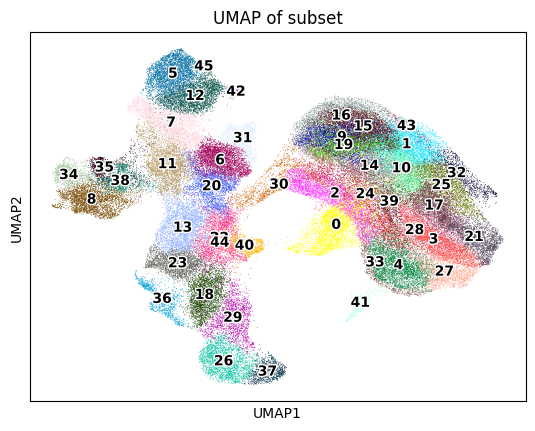

In [56]:
sc.tl.leiden(sub, resolution=2.0, key_added="leiden_clusters_sub_res2")
sc.pl.umap(
    sub, 
    color='leiden_clusters_sub_res2', 
    title="UMAP of subset", 
    legend_loc='on data',  
    legend_fontsize=10,    
    legend_fontoutline=2   
)

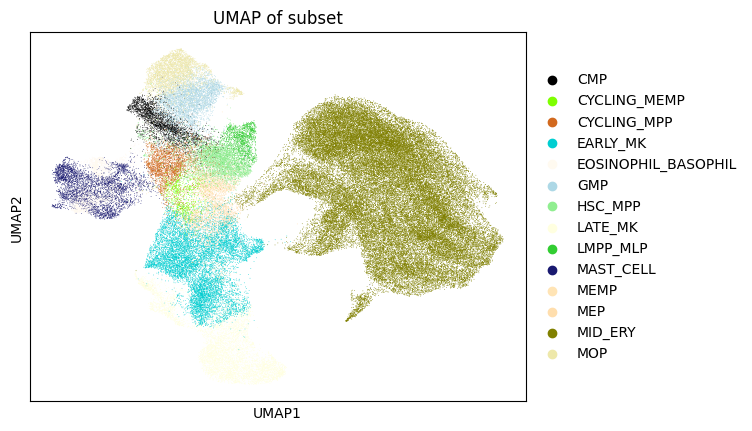

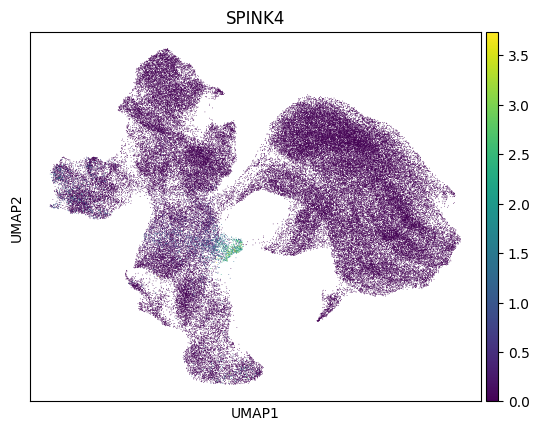

In [57]:
sc.pp.normalize_total(sub, target_sum=1e4)
sc.pp.log1p(sub)
sc.pl.umap(sub, color='celltype_annotation', title="UMAP of subset")
sc.pl.umap(sub, color='SPINK4')


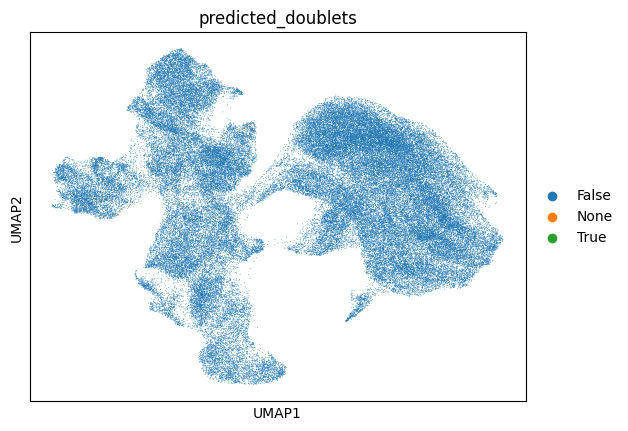

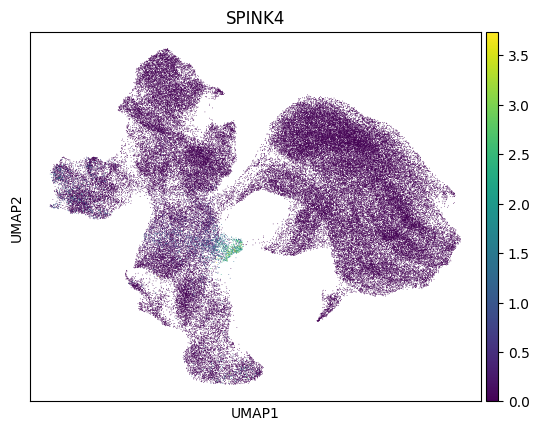

In [59]:
sc.pl.umap(sub, color='predicted_doublets')
sc.pl.umap(sub, color='SPINK4')


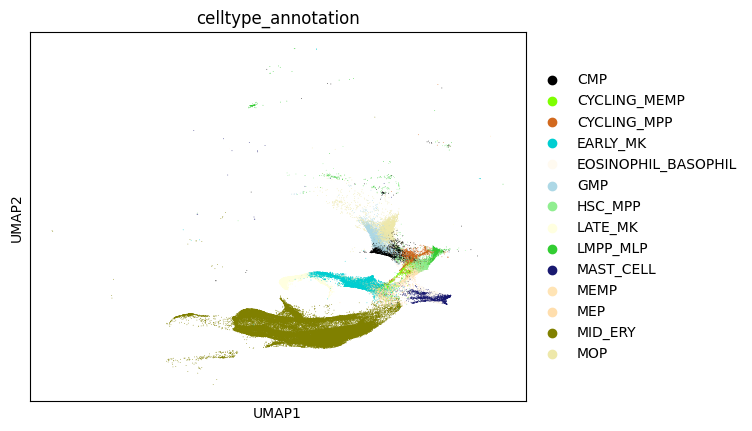

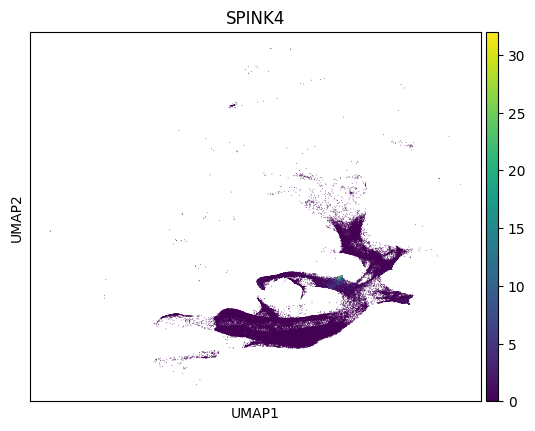

In [32]:
sc.pl.umap(sub, color=['celltype_annotation'])
sc.pl.umap(sub, color='SPINK4')
